<a href="https://colab.research.google.com/github/23028939/project-2025-priyanka/blob/main/Copy_of_dsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA PREPROCESSING

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [3]:
#connecting collab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/PCOS_data.csv')
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

In [5]:
df.shape                 #prints the shape of dataframe

(541, 45)

In [6]:
df.dtypes                  #prints type of data

,0
Sl. No,int64
Patient File No.,int64
PCOS (Y/N),int64
Age (yrs),int64
Weight (Kg),float64
Height(Cm),float64
BMI,float64
Blood Group,int64
Pulse rate(bpm),int64
RR (breaths/min),int64


In [7]:
df.columns             #prints the columns of dataset

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [8]:
#removing unnecessary columns
df.drop(columns=['Sl. No', 'Patient File No.', 'Blood Group', 'Unnamed: 44'],  inplace=True, errors='ignore')
#print(df.columns)

df.columns = df.columns.str.strip()           #removes leading and trailing whitespaces from column names
df.columns = df.columns.str.replace(' ', '_') #replaces spaces in column names with underscores
df.columns = df.columns.str.upper()           #converts column names to uppercase
df.columns = df.columns.str.replace('-', '_') #replaces hyphens in column names with underscores
df.columns = df.columns.str.replace('.', '', regex=False) #replaces periods in column names with nothing

print(df.columns)


Index(['PCOS_(Y/N)', 'AGE_(YRS)', 'WEIGHT_(KG)', 'HEIGHT(CM)', 'BMI',
       'PULSE_RATE(BPM)', 'RR_(BREATHS/MIN)', 'HB(G/DL)', 'CYCLE(R/I)',
       'CYCLE_LENGTH(DAYS)', 'MARRAIGE_STATUS_(YRS)', 'PREGNANT(Y/N)',
       'NO_OF_ABORTIONS', 'I___BETA_HCG(MIU/ML)', 'II____BETA_HCG(MIU/ML)',
       'FSH(MIU/ML)', 'LH(MIU/ML)', 'FSH/LH', 'HIP(INCH)', 'WAIST(INCH)',
       'WAIST:HIP_RATIO', 'TSH_(MIU/L)', 'AMH(NG/ML)', 'PRL(NG/ML)',
       'VIT_D3_(NG/ML)', 'PRG(NG/ML)', 'RBS(MG/DL)', 'WEIGHT_GAIN(Y/N)',
       'HAIR_GROWTH(Y/N)', 'SKIN_DARKENING_(Y/N)', 'HAIR_LOSS(Y/N)',
       'PIMPLES(Y/N)', 'FAST_FOOD_(Y/N)', 'REGEXERCISE(Y/N)',
       'BP__SYSTOLIC_(MMHG)', 'BP__DIASTOLIC_(MMHG)', 'FOLLICLE_NO_(L)',
       'FOLLICLE_NO_(R)', 'AVG_F_SIZE_(L)_(MM)', 'AVG_F_SIZE_(R)_(MM)',
       'ENDOMETRIUM_(MM)'],
      dtype='object')


In [9]:
df.dtypes

,0
PCOS_(Y/N),int64
AGE_(YRS),int64
WEIGHT_(KG),float64
HEIGHT(CM),float64
BMI,float64
PULSE_RATE(BPM),int64
RR_(BREATHS/MIN),int64
HB(G/DL),float64
CYCLE(R/I),int64
CYCLE_LENGTH(DAYS),int64


In [10]:
#converting object columns to numeric
df['II____BETA_HCG(MIU/ML)'] = pd.to_numeric(df['II____BETA_HCG(MIU/ML)'], errors='coerce')
df['AMH(NG/ML)'] = pd.to_numeric(df['AMH(NG/ML)'], errors='coerce')
df.dtypes

,0
PCOS_(Y/N),int64
AGE_(YRS),int64
WEIGHT_(KG),float64
HEIGHT(CM),float64
BMI,float64
PULSE_RATE(BPM),int64
RR_(BREATHS/MIN),int64
HB(G/DL),float64
CYCLE(R/I),int64
CYCLE_LENGTH(DAYS),int64


In [11]:
df.isnull().sum()    #prints sum of missing values

,0
PCOS_(Y/N),0
AGE_(YRS),0
WEIGHT_(KG),0
HEIGHT(CM),0
BMI,0
PULSE_RATE(BPM),0
RR_(BREATHS/MIN),0
HB(G/DL),0
CYCLE(R/I),0
CYCLE_LENGTH(DAYS),0


In [12]:
#filling missing values using median interpretation
df['MARRAIGE_STATUS_(YRS)'].fillna(df['MARRAIGE_STATUS_(YRS)'].median(), inplace=True)
df['FAST_FOOD_(Y/N)'].fillna(df['FAST_FOOD_(Y/N)'].median(), inplace=True)
df['II____BETA_HCG(MIU/ML)'].fillna(df['II____BETA_HCG(MIU/ML)'].median(), inplace=True)
df['AMH(NG/ML)'].fillna(df['AMH(NG/ML)'].median(), inplace=True)

/tmp/ipython-input-12-2070178971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRAIGE_STATUS_(YRS)'].fillna(df['MARRAIGE_STATUS_(YRS)'].median(), inplace=True)
/tmp/ipython-input-12-2070178971.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [13]:
#EXPLORATORY DATA ANALYSIS

In [14]:
print(df.describe())        #prints summary statistics

       PCOS_(Y/N)   AGE_(YRS)  WEIGHT_(KG)  HEIGHT(CM)         BMI  \
count  541.000000  541.000000   541.000000  541.000000  541.000000   
mean     0.327172   31.430684    59.637153  156.484835   24.307579   
std      0.469615    5.411006    11.028287    6.033545    4.055129   
min      0.000000   20.000000    31.000000  137.000000   12.400000   
25%      0.000000   28.000000    52.000000  152.000000   21.600000   
50%      0.000000   31.000000    59.000000  156.000000   24.200000   
75%      1.000000   35.000000    65.000000  160.000000   26.600000   
max      1.000000   48.000000   108.000000  180.000000   38.900000   

       PULSE_RATE(BPM)  RR_(BREATHS/MIN)    HB(G/DL)  CYCLE(R/I)  \
count       541.000000        541.000000  541.000000  541.000000   
mean         73.247689         19.243993   11.160037    2.560074   
std           4.430285          1.688629    0.866904    0.901950   
min          13.000000         16.000000    8.500000    2.000000   
25%          72.000000       

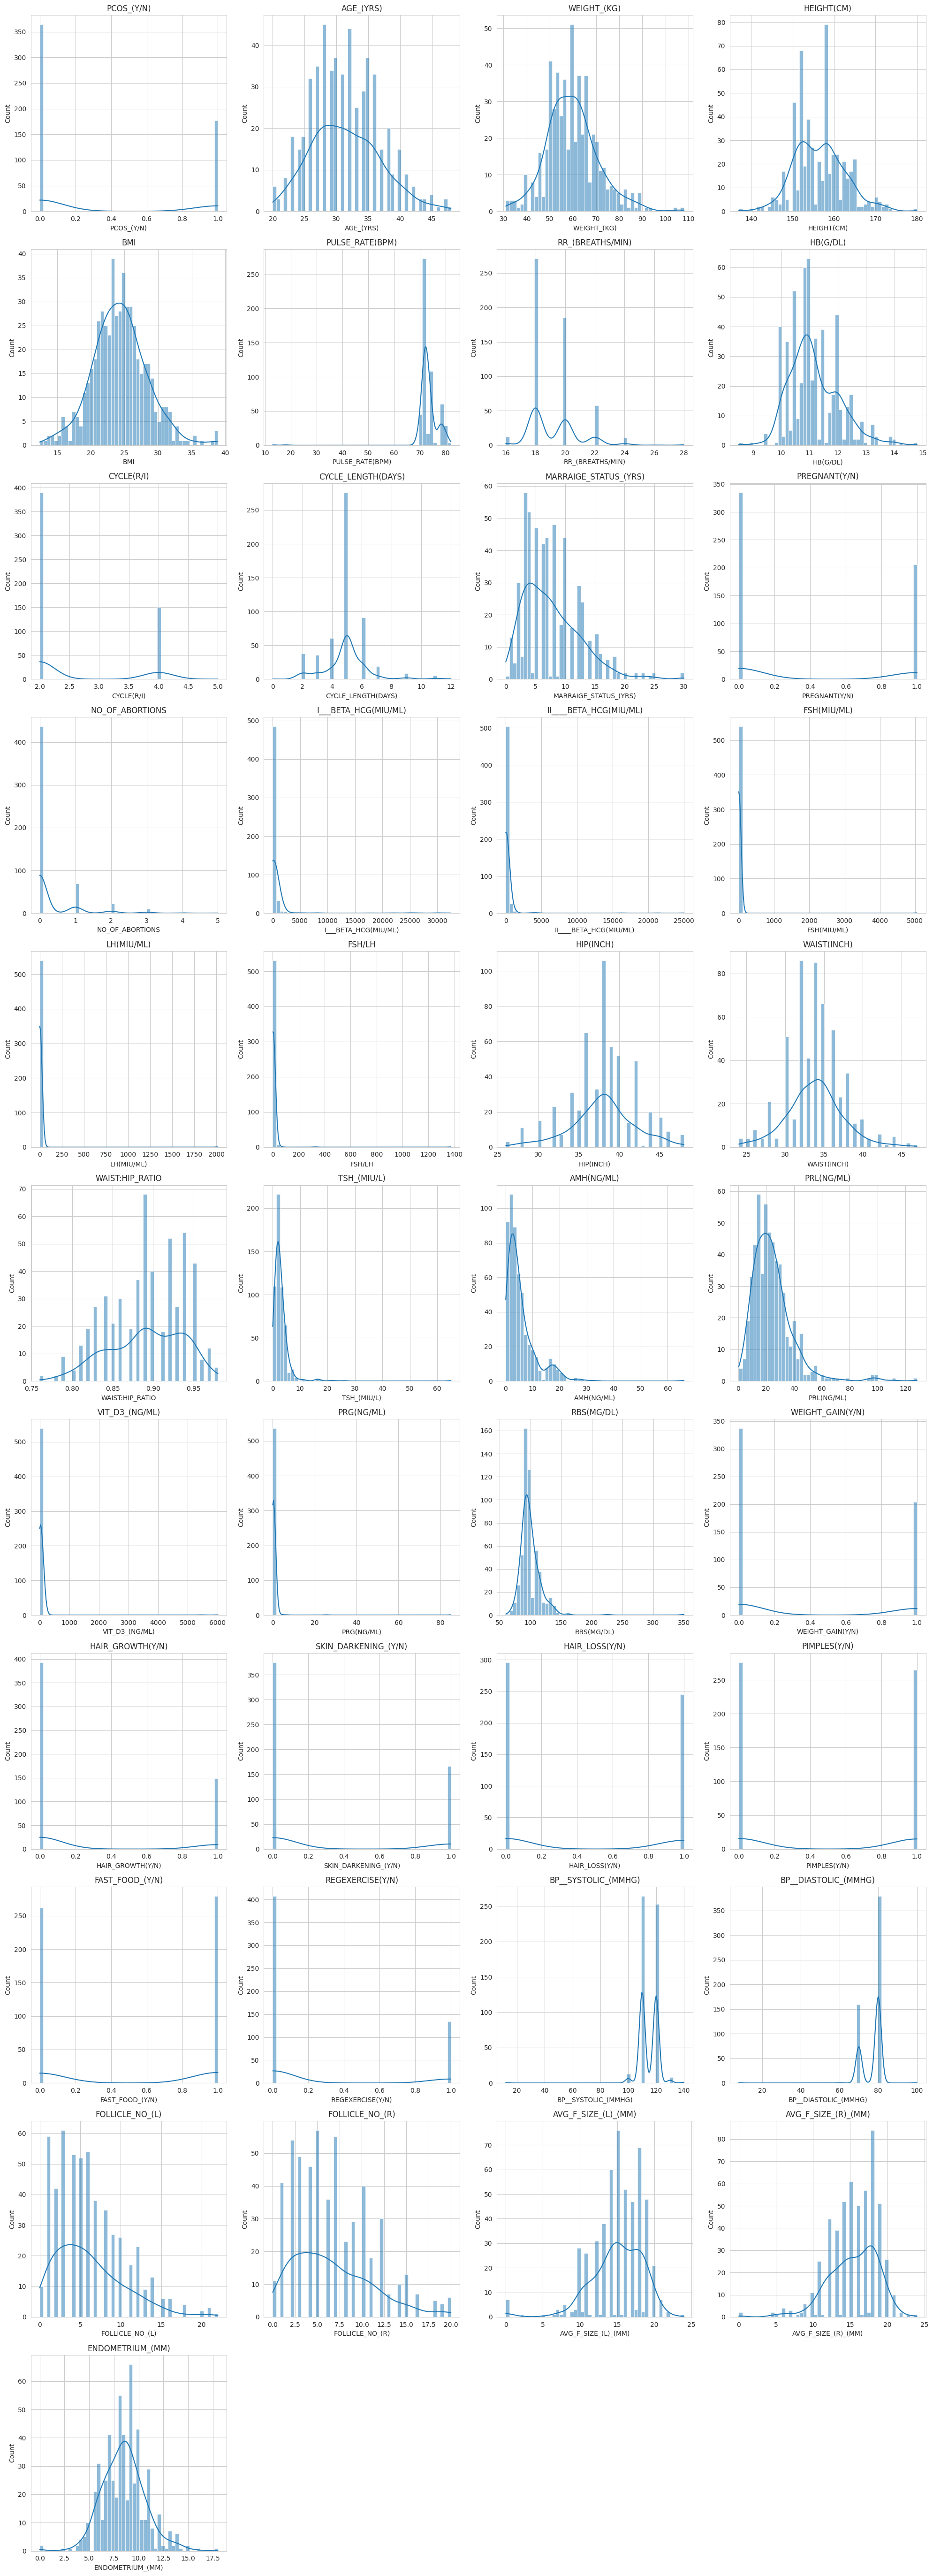

In [16]:
sns.set_style('whitegrid')

# Calculating the number of rows and columns for the subplot grid
num_cols = 4  # Number of columns in the grid
num_rows = int(np.ceil(len(df.columns) / num_cols))  # Calculate rows based on columns

# Creating the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through each column to create individual histograms
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hiding any empty subplots if the number of columns doesn't divide evenly
for i in range(len(df.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()

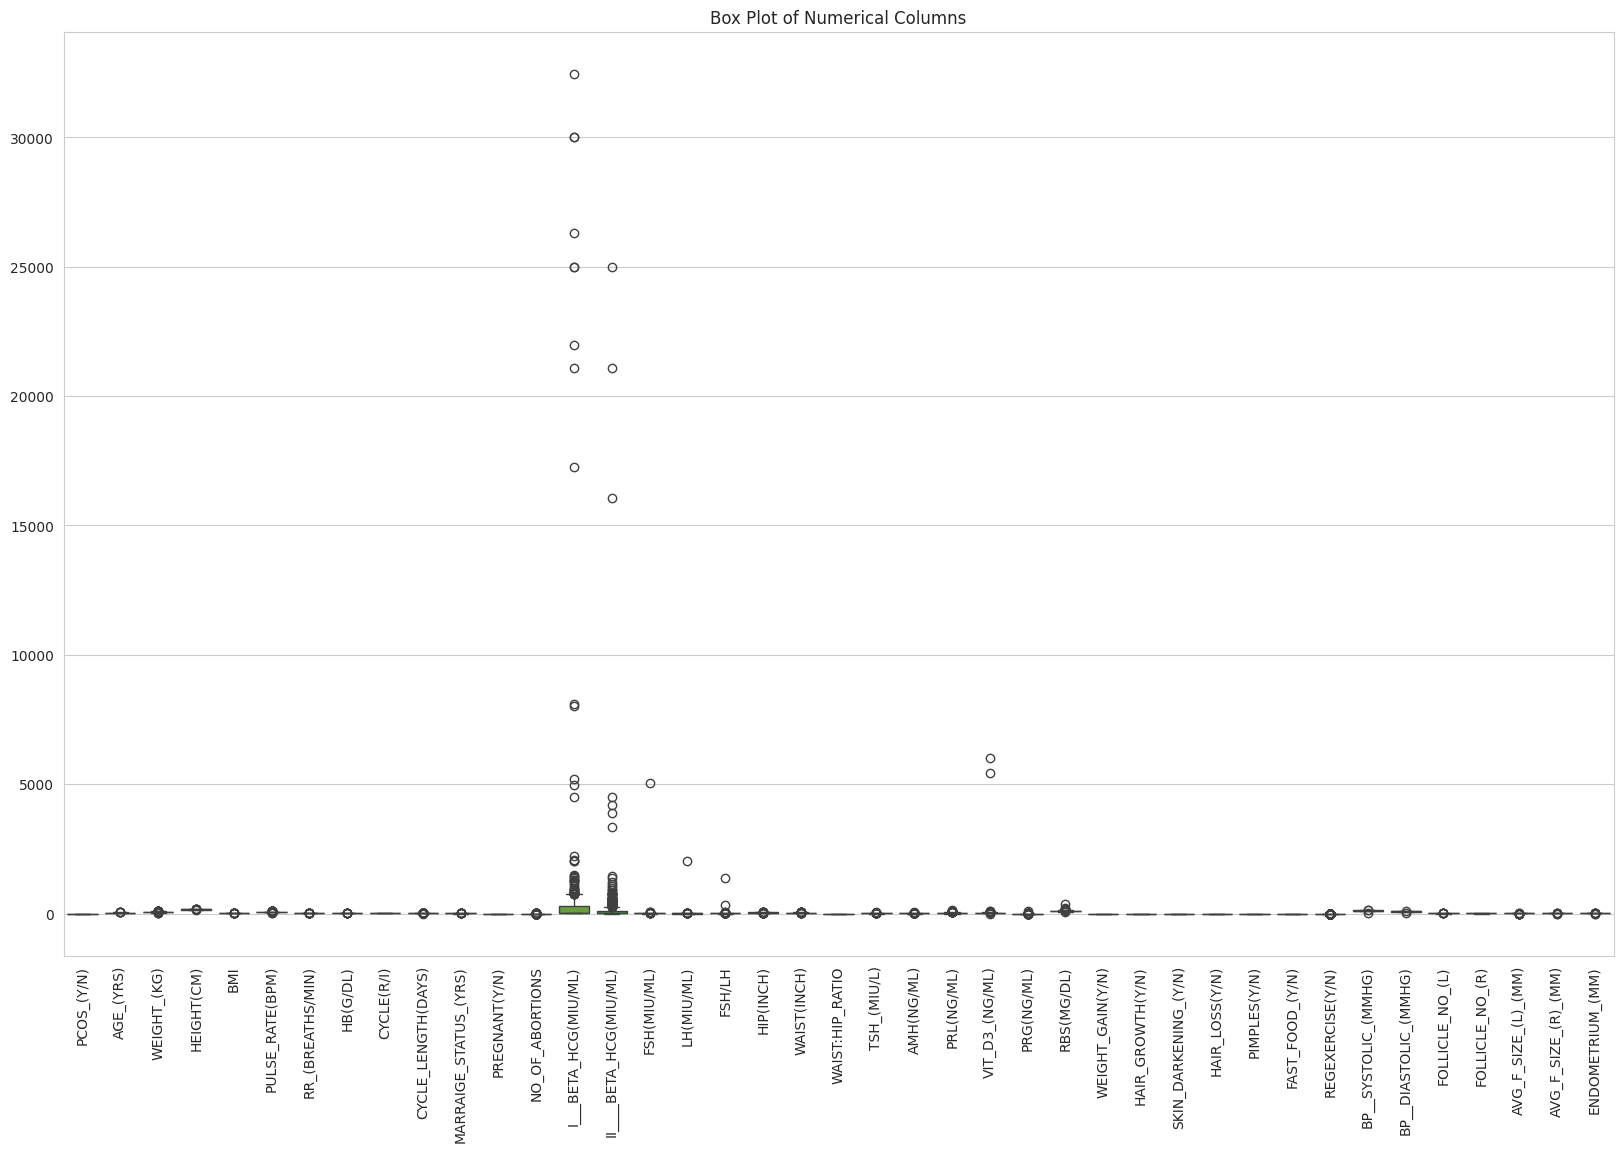

In [17]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df)
plt.xticks(rotation=90)             # Rotate x-axis labels for readability
plt.title('Box Plot of Numerical Columns')
plt.show()

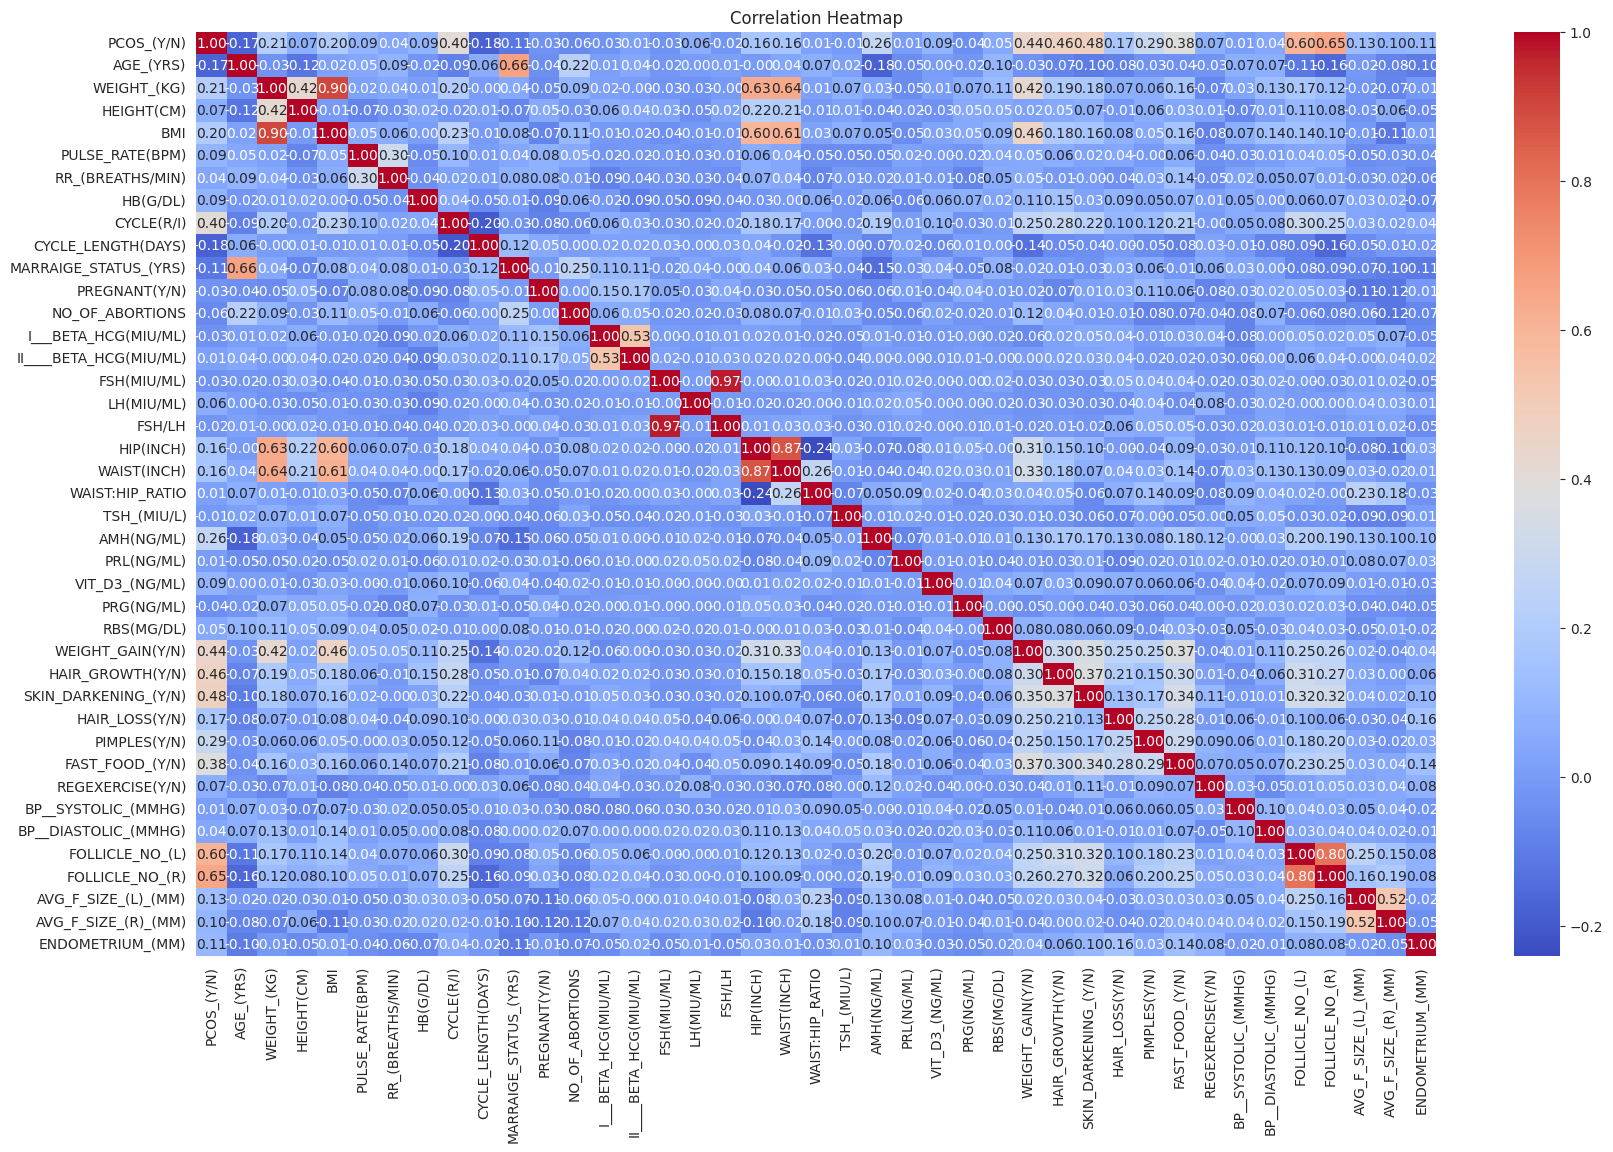

In [18]:
# Calculating correlation matrix for all numerical columns
correlation_matrix = df.corr()
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.head()

,PCOS_(Y/N),AGE_(YRS),WEIGHT_(KG),HEIGHT(CM),BMI,PULSE_RATE(BPM),RR_(BREATHS/MIN),HB(G/DL),CYCLE(R/I),CYCLE_LENGTH(DAYS),...,PIMPLES(Y/N),FAST_FOOD_(Y/N),REGEXERCISE(Y/N),BP__SYSTOLIC_(MMHG),BP__DIASTOLIC_(MMHG),FOLLICLE_NO_(L),FOLLICLE_NO_(R),AVG_F_SIZE_(L)_(MM),AVG_F_SIZE_(R)_(MM),ENDOMETRIUM_(MM)
0,0,28,44.6,152.0,19.3,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [20]:
# feature selection and target definition
x=df.drop(columns=['PCOS_(Y/N)'])
y=df['PCOS_(Y/N)']

In [21]:
# Splitting data into Training, Validation, and Test sets

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape of x_train_val after first split: {x_train_val.shape}")
print(f"Shape of x_test after first split: {x_test.shape}")
print(f"Shape of y_train_val after first split: {y_train_val.shape}")
print(f"Shape of y_test after first split: {y_test.shape}")
print("\n---\n")


Shape of x_train_val after first split: (432, 40)
Shape of x_test after first split: (109, 40)
Shape of y_train_val after first split: (432,)
Shape of y_test after first split: (109,)

---



In [22]:
#Splitting the training/validation set into a training set and a validation set

validation_size_proportion = 0.20 / (1 - 0.20) # 0.20 / 0.80 = 0.25

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=validation_size_proportion, random_state=42, stratify=y_train_val)


print(f"Shape of x_train after second split: {x_train.shape}")
print(f"Shape of x_val after second split: {x_val.shape}")
print(f"Shape of y_train after second split: {y_train.shape}")
print(f"Shape of y_val after second split: {y_val.shape}")


Shape of x_train after second split: (324, 40)
Shape of x_val after second split: (108, 40)
Shape of y_train after second split: (324,)
Shape of y_val after second split: (108,)


In [23]:
## Applying StandardScaler to Training, Validation, and Test sets

# Create a StandardScaler object
scaler = StandardScaler()

#The scaler learns the mean and standard deviation from training set.
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


#coverting them back to dataframe
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_val_scaled_df = pd.DataFrame(x_val_scaled, columns=x_val.columns, index=x_val.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

print("Shapes after scaling:")
print(f"x_train_scaled_df shape: {x_train_scaled_df.shape}")
print(f"x_val_scaled_df shape: {x_val_scaled_df.shape}")
print(f"x_test_scaled_df shape: {x_test_scaled_df.shape}")

print("\nFirst 5 rows of scaled training data:")
print(x_train_scaled_df.head())

print("\nFirst 5 rows of scaled validation data:")
print(x_val_scaled_df.head())

print("\nFirst 5 rows of scaled test data:")
print(x_test_scaled_df.head())

Shapes after scaling:
x_train_scaled_df shape: (324, 40)
x_val_scaled_df shape: (108, 40)
x_test_scaled_df shape: (109, 40)

First 5 rows of scaled training data:
     AGE_(YRS)  WEIGHT_(KG)  HEIGHT(CM)       BMI  PULSE_RATE(BPM)  \
83    0.707273    -1.357896   -1.719936 -0.873060        -0.200449   
170  -0.604334    -0.449074    0.110194 -0.535850        -0.009993   
457  -0.042217    -1.860837    0.359092 -2.173730         1.323202   
9     0.894646    -0.625544   -1.054434 -0.246812         1.323202   
14    0.519901    -0.157897    0.942071 -0.559936         0.180463   

     RR_(BREATHS/MIN)  HB(G/DL)  CYCLE(R/I)  CYCLE_LENGTH(DAYS)  \
83           0.434035 -0.860912   -0.647713            0.023970   
170         -0.169516 -0.127450   -0.647713            0.671152   
457          0.434035  1.094986    1.526992           -1.917578   
9            0.434035 -1.349886    1.526992           -1.917578   
14           1.641137  0.728255   -0.647713            0.023970   

     MARRAIGE

In [24]:
## Building and Evaluating a Logistic Regression Model



model_lr = LogisticRegression(random_state=42) # random_state for reproducibility

#Train the model on the SCALED training data

print("Training Logistic Regression model...")
model_lr.fit(x_train_scaled_df, y_train)
print("Training complete.")
print("\n---\n")


# Evaluating the model on the SCALED validation data
print("Evaluating Logistic Regression on Validation Set:")
y_val_pred_lr = model_lr.predict(x_val_scaled_df)

# Calculating validation metrics
accuracy_val_lr = accuracy_score(y_val, y_val_pred_lr)
precision_val_lr = precision_score(y_val, y_val_pred_lr)
recall_val_lr = recall_score(y_val, y_val_pred_lr)
f1_val_lr = f1_score(y_val, y_val_pred_lr)

print(f"  Validation Accuracy: {accuracy_val_lr:.4f}")
print(f"  Validation Precision: {precision_val_lr:.4f}")
print(f"  Validation Recall: {recall_val_lr:.4f}")
print(f"  Validation F1 Score: {f1_val_lr:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_lr))
print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_lr))
print("\n---\n")


# Evaluate the final model on the SCALED test data
print("Evaluating Logistic Regression on Test Set (Final Evaluation):")
y_test_pred_lr = model_lr.predict(x_test_scaled_df)

# Calculat test metrics
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
precision_test_lr = precision_score(y_test, y_test_pred_lr)
recall_test_lr = recall_score(y_test, y_test_pred_lr)
f1_test_lr = f1_score(y_test, y_test_pred_lr)

print(f"  Test Accuracy: {accuracy_test_lr:.4f}")
print(f"  Test Precision: {precision_test_lr:.4f}")
print(f"  Test Recall: {recall_test_lr:.4f}")
print(f"  Test F1 Score: {f1_test_lr:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_lr))
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))
print("\n---\n")


# You can also get the model's coefficients (useful for interpreting Logistic Regression)
print("Logistic Regression Coefficients:")
coefficients = pd.DataFrame({'Feature': x_train_scaled_df.columns, 'Coefficient': model_lr.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))
print("\n---\n")

# You can get the intercept (bias term)
print(f"Logistic Regression Intercept: {model_lr.intercept_[0]:.4f}")

Training Logistic Regression model...
Training complete.

---

Evaluating Logistic Regression on Validation Set:
  Validation Accuracy: 0.8796
  Validation Precision: 0.7895
  Validation Recall: 0.8571
  Validation F1 Score: 0.8219

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        73
           1       0.79      0.86      0.82        35

    accuracy                           0.88       108
   macro avg       0.86      0.87      0.87       108
weighted avg       0.88      0.88      0.88       108


Validation Confusion Matrix:
[[65  8]
 [ 5 30]]

---

Evaluating Logistic Regression on Test Set (Final Evaluation):
  Test Accuracy: 0.8991
  Test Precision: 0.8378
  Test Recall: 0.8611
  Test F1 Score: 0.8493

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.84      0.86      0.85        36



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


## Building and Evaluating a Random Forest Classifier Model

#Random Forest Classifier model instance

model_rf = RandomForestClassifier(random_state=42) # random_state for reproducibility

#Training the model on the SCALED training data
print("Training Random Forest Classifier model...")
model_rf.fit(x_train_scaled_df, y_train)
print("Training complete.")
print("\n---\n")


#Evaluating the model on the SCALED validation data
print("Evaluating Random Forest Classifier on Validation Set:")
y_val_pred_rf = model_rf.predict(x_val_scaled_df)

# Calculating validation metrics
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
precision_val_rf = precision_score(y_val, y_val_pred_rf)
recall_val_rf = recall_score(y_val, y_val_pred_rf)
f1_val_rf = f1_score(y_val, y_val_pred_rf)

print(f"  Validation Accuracy: {accuracy_val_rf:.4f}")
print(f"  Validation Precision: {precision_val_rf:.4f}")
print(f"  Validation Recall: {recall_val_rf:.4f}")
print(f"  Validation F1 Score: {f1_val_rf:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_rf))
print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))
print("\n---\n")


#Evaluating the final model on the SCALED test data
print("Evaluating Random Forest Classifier on Test Set (Final Evaluation):")
y_test_pred_rf = model_rf.predict(x_test_scaled_df)

# Calculate test metrics
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

print(f"  Test Accuracy: {accuracy_test_rf:.4f}")
print(f"  Test Precision: {precision_test_rf:.4f}")
print(f"  Test Recall: {recall_test_rf:.4f}")
print(f"  Test F1 Score: {f1_test_rf:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_rf))
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))
print("\n---\n")

# Random Forests provide feature importances
print("Random Forest Feature Importances:")
importances_rf = pd.DataFrame({'Feature': x_train_scaled_df.columns, 'Importance': model_rf.feature_importances_})
print(importances_rf.sort_values(by='Importance', ascending=False))

Training Random Forest Classifier model...
Training complete.

---

Evaluating Random Forest Classifier on Validation Set:
  Validation Accuracy: 0.9167
  Validation Precision: 0.9062
  Validation Recall: 0.8286
  Validation F1 Score: 0.8657

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.91      0.83      0.87        35

    accuracy                           0.92       108
   macro avg       0.91      0.89      0.90       108
weighted avg       0.92      0.92      0.92       108


Validation Confusion Matrix:
[[70  3]
 [ 6 29]]

---

Evaluating Random Forest Classifier on Test Set (Final Evaluation):
  Test Accuracy: 0.9083
  Test Precision: 0.9333
  Test Recall: 0.7778
  Test F1 Score: 0.8485

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        73
           1       0.93      0.78      0

In [26]:
!pip install xgboost

In [28]:
## Building and Evaluating an XGBoost Classifier Model

model_xgb = xgb.XGBClassifier(objective='binary:logistic', # Objective for binary classification
                              eval_metric='logloss',      # Evaluation metric
                              use_label_encoder=False,    # Suppress a warning about label encoding
                              random_state=42)             # random_state for reproducibility

#Training the model on the SCALED training data
print("Training XGBoost Classifier model...")
eval_set = [(x_val_scaled_df, y_val)] # Create a list of evaluation sets

model_xgb.fit(x_train_scaled_df, y_train,
              eval_set=[(x_val_scaled_df, y_val)],
              verbose=False)
print("Training complete.")
print("\n---\n")


#Evaluating the model on the SCALED validation data
print("Evaluating XGBoost Classifier on Validation Set:")
y_val_pred_xgb = model_xgb.predict(x_val_scaled_df)

# Calculate validation metrics
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
precision_val_xgb = precision_score(y_val, y_val_pred_xgb)
recall_val_xgb = recall_score(y_val, y_val_pred_xgb)
f1_val_xgb = f1_score(y_val, y_val_pred_xgb)

print(f"  Validation Accuracy: {accuracy_val_xgb:.4f}")
print(f"  Validation Precision: {precision_val_xgb:.4f}")
print(f"  Validation Recall: {recall_val_xgb:.4f}")
print(f"  Validation F1 Score: {f1_val_xgb:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))
print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb))
print("\n---\n")


#Evaluating the final model on the SCALED test data
print("Evaluating XGBoost Classifier on Test Set (Final Evaluation):")
y_test_pred_xgb = model_xgb.predict(x_test_scaled_df)

# Calculate test metrics
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
precision_test_xgb = precision_score(y_test, y_test_pred_xgb)
recall_test_xgb = recall_score(y_test, y_test_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

print(f"  Test Accuracy: {accuracy_test_xgb:.4f}")
print(f"  Test Precision: {precision_test_xgb:.4f}")
print(f"  Test Recall: {recall_test_xgb:.4f}")
print(f"  Test F1 Score: {f1_test_xgb:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_xgb))
print("\n---\n")

# XGBoost also provides feature importances
print("XGBoost Feature Importances:")
importances_xgb = model_xgb.get_booster().get_score(importance_type='gain')
# Converting to DataFrame for easier viewing and sorting
importances_xgb_df = pd.DataFrame(list(importances_xgb.items()), columns=['Feature', 'Importance'])
print(importances_xgb_df.sort_values(by='Importance', ascending=False))

Training XGBoost Classifier model...
Training complete.

---

Evaluating XGBoost Classifier on Validation Set:
  Validation Accuracy: 0.8796
  Validation Precision: 0.8056
  Validation Recall: 0.8286
  Validation F1 Score: 0.8169

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        73
           1       0.81      0.83      0.82        35

    accuracy                           0.88       108
   macro avg       0.86      0.87      0.86       108
weighted avg       0.88      0.88      0.88       108


Validation Confusion Matrix:
[[66  7]
 [ 6 29]]

---

Evaluating XGBoost Classifier on Test Set (Final Evaluation):


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Test Accuracy: 0.8991
  Test Precision: 0.9032
  Test Recall: 0.7778
  Test F1 Score: 0.8358

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        73
           1       0.90      0.78      0.84        36

    accuracy                           0.90       109
   macro avg       0.90      0.87      0.88       109
weighted avg       0.90      0.90      0.90       109


Test Confusion Matrix:
[[70  3]
 [ 8 28]]

---

XGBoost Feature Importances:
                   Feature  Importance
32         FOLLICLE_NO_(R)    6.541317
30    BP__DIASTOLIC_(MMHG)    2.485245
28         FAST_FOOD_(Y/N)    2.209178
26    SKIN_DARKENING_(Y/N)    1.736397
31         FOLLICLE_NO_(L)    1.613343
25        HAIR_GROWTH(Y/N)    1.574571
29        REGEXERCISE(Y/N)    1.487486
24        WEIGHT_GAIN(Y/N)    1.409616
11  II____BETA_HCG(MIU/ML)    1.396541
7               CYCLE(R/I)    1.283961
14                  FSH/LH    1.242578
1  

/tmp/ipython-input-31-2170930222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance_rf, y=feat_importance_rf.index, palette='viridis')


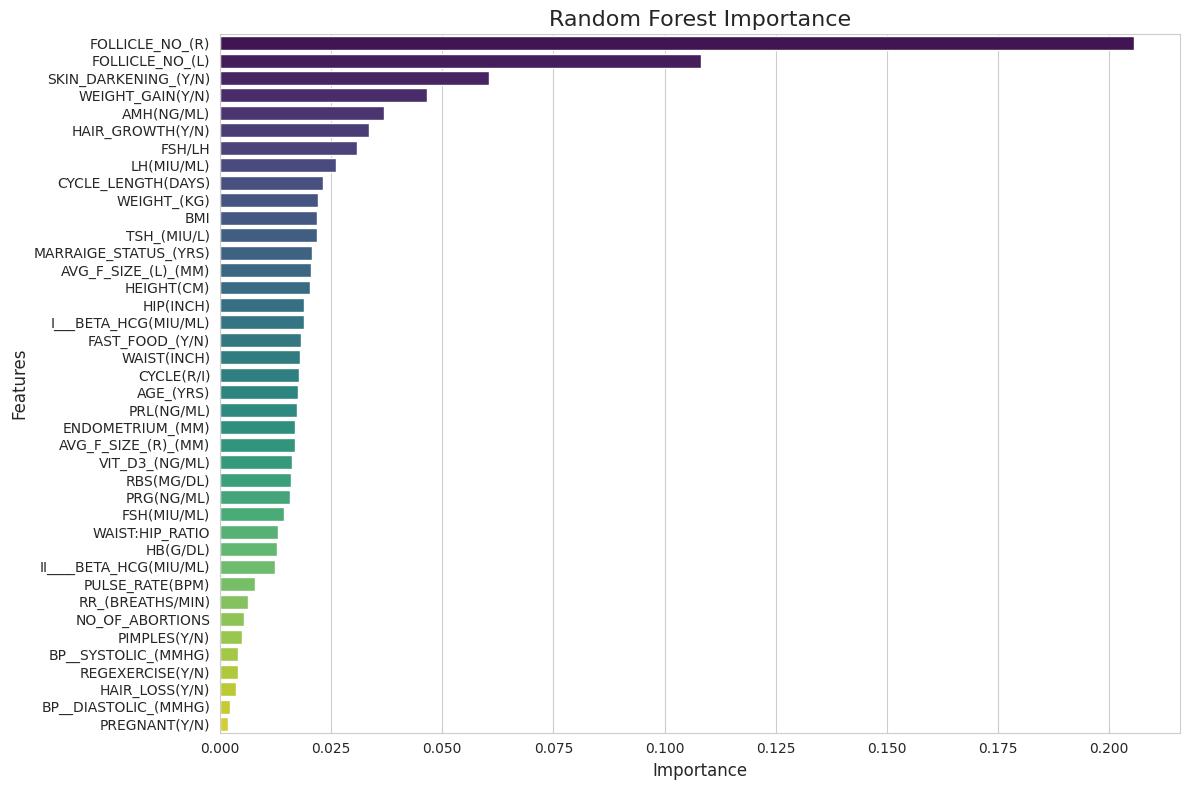

In [31]:
# Random forest is your best model (based on the previous comparison)
# And 'x_train_scaled_df' contains the feature names

importances_rf = model_rf.feature_importances_

feature_names = x_train_scaled_df.columns
feat_importance_rf = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feat_importance_rf, y=feat_importance_rf.index, palette='viridis')
plt.title('Random Forest Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()